<a href="https://colab.research.google.com/github/nekroz-coder/MachineLearning/blob/main/%20%20%20%20Midterm%20Exam/UTS_Machine_Learning_Customer_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Nur MAajid

NIM  : 1103228145

Study: S1 Teknik Komputer

# About Dataset
**Context**

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
Content

**Attributes**

**People**

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**

Need to perform clustering to summarize customer segments.

**Acknowledgement**

The dataset for this project is provided by Dr. Omar Romero-Hernandez.

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/marketing_campaign.xls", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

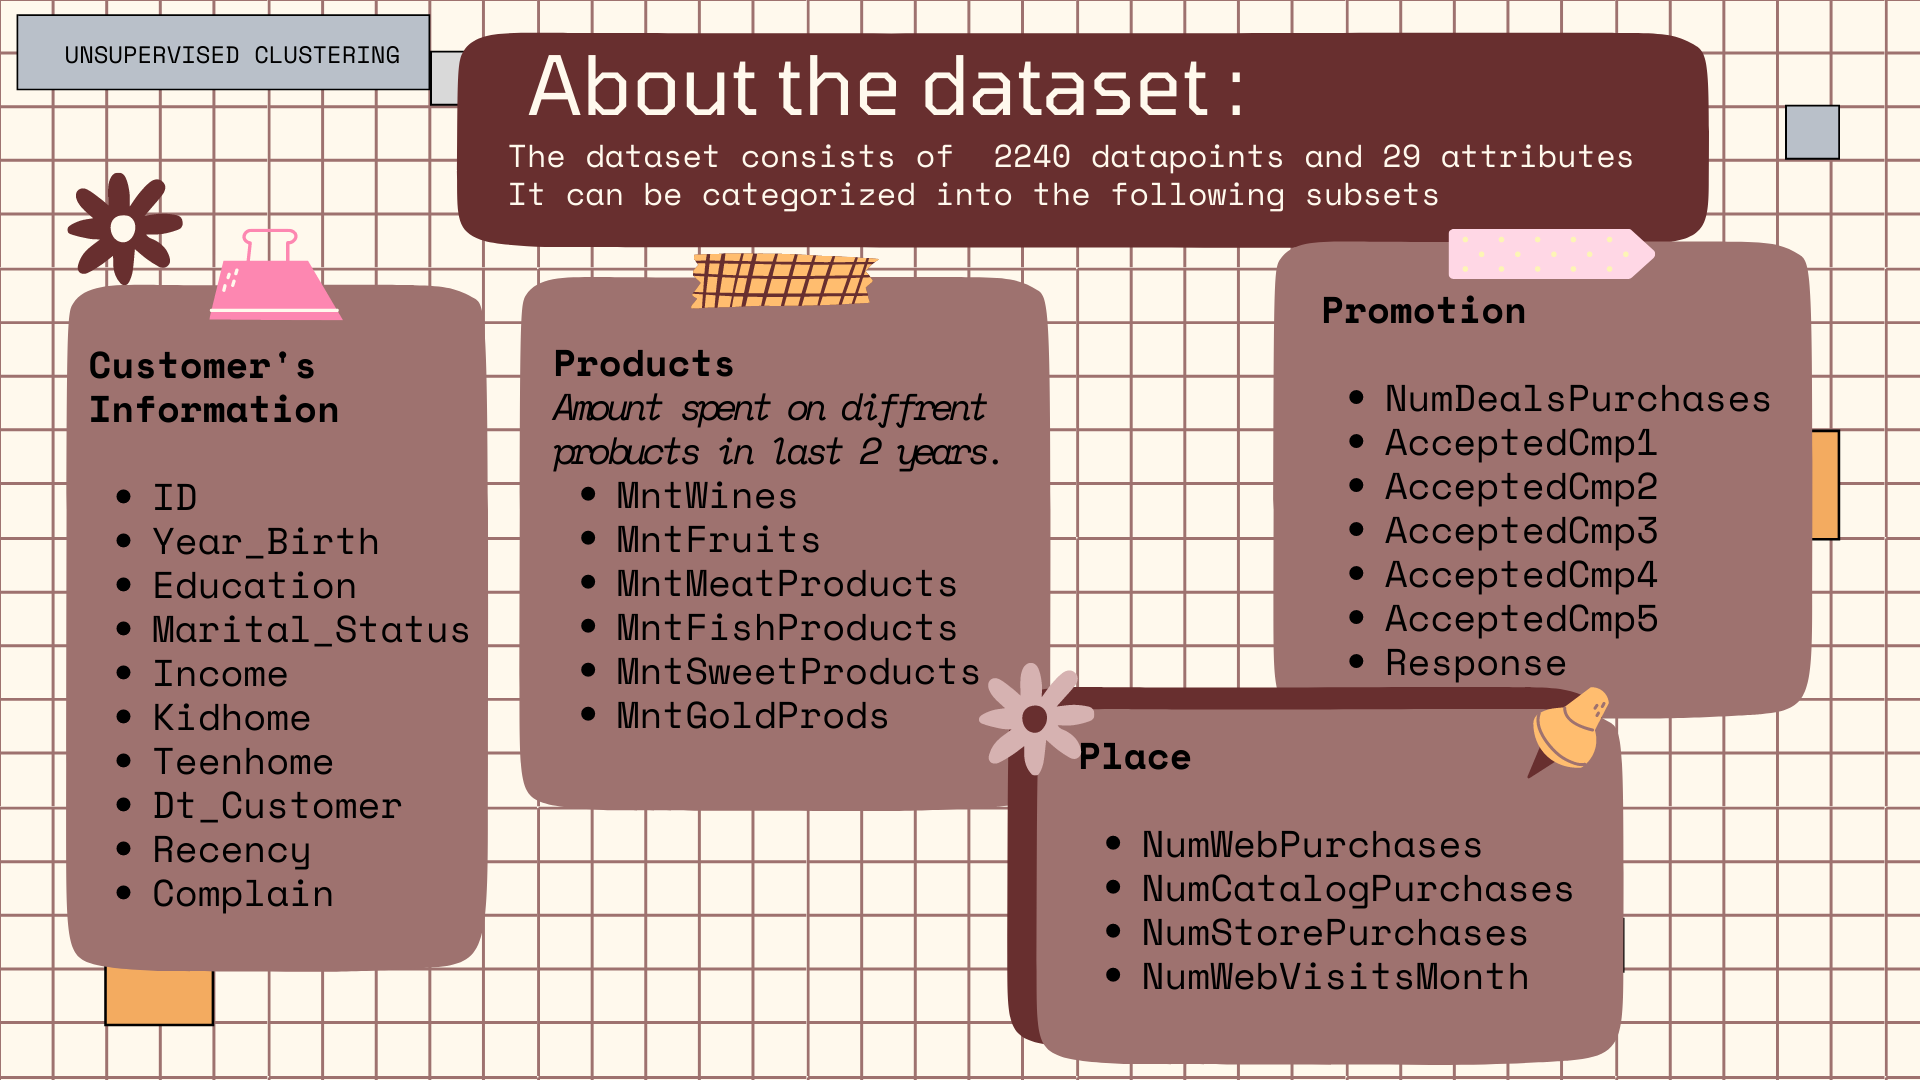

**Di bagian ini**

Data Cleaning

Feature Engineering

Untuk, memahami sepenuhnya langkah-langkah apa yang sebaiknya saya ambil untuk membersihkan dataset. Mari kita lihat informasi di dalam data.

In [3]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari output di atas, kita dapat menyimpulkan dan mencatat bahwa:

Ada nilai yang hilang pada variabel pendapatan (income).
Dt_Customer yang menunjukkan tanggal pelanggan bergabung ke database tidak diurai sebagai DateTime.
Ada beberapa fitur kategorikal dalam data frame kita; karena ada beberapa fitur dengan dtype: object). Jadi, kita perlu mengkodekannya menjadi bentuk numerik nanti.

Pertama-tama, untuk nilai yang hilang, saya akan langsung menghapus baris yang memiliki nilai pendapatan yang hilang.

In [4]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


Pada langkah berikutnya, saya akan membuat sebuah fitur dari "Dt_Customer" yang menunjukkan jumlah hari sejak seorang pelanggan terdaftar dalam database perusahaan. Namun, untuk menjadikannya sederhana, saya akan mengambil nilai ini relatif terhadap pelanggan terbaru dalam catatan.

Dengan demikian, untuk mendapatkan nilai-nilai tersebut, saya harus memeriksa tanggal terbaru (newest) dan terlama (oldest) yang tercatat.


In [5]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-5-627b1cd2d108>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


Membuat fitur ("Customer_For") yang menunjukkan jumlah hari sejak pelanggan mulai berbelanja di toko relatif terhadap tanggal terakhir yang tercatat.

In [6]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Sekarang kita akan menjelajahi nilai-nilai unik dalam fitur-fitur kategorikal untuk mendapatkan gambaran yang jelas tentang data.

In [7]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


**Dalam bagian berikutnya, saya akan melakukan langkah-langkah berikut untuk membuat beberapa fitur baru:**

1. Menyusun "Umur" pelanggan berdasarkan "Year_Birth" yang menunjukkan tahun kelahiran orang tersebut.
2. Membuat fitur lain "Spent" yang menunjukkan total belanja pelanggan dalam berbagai kategori selama dua tahun.
3. Membuat fitur lain "Living_With" dari "Marital_Status" untuk mengekstrak situasi tinggal pasangan.
4. Membuat fitur "Children" untuk menunjukkan jumlah total anak di rumah tangga, yaitu anak-anak dan remaja.
5. Untuk mendapatkan kejelasan lebih lanjut tentang rumah tangga, membuat fitur yang menunjukkan "Family_Size".
6. Membuat fitur "Is_Parent" untuk menunjukkan status sebagai orang tua.
7. Terakhir, saya akan membuat tiga kategori dalam "Education" dengan menyederhanakan hitungan nilainya.
8. Menghapus beberapa fitur yang redundan.


In [8]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Sekarang setelah kita memiliki beberapa fitur baru, mari kita lihat statistik data tersebut.

In [9]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

Statistik di atas menunjukkan beberapa inkonsistensi pada rata-rata Pendapatan dan Usia serta Pendapatan dan usia maksimum.

Perlu diperhatikan bahwa usia maksimum adalah 128 tahun. Saya menghitung usia yang akan menjadi usia saat ini (yaitu, 2021), dan data ini sudah agak tua.

Saya harus melihat gambaran lebih luas dari data tersebut. Saya akan membuat beberapa plot untuk beberapa fitur yang dipilih.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

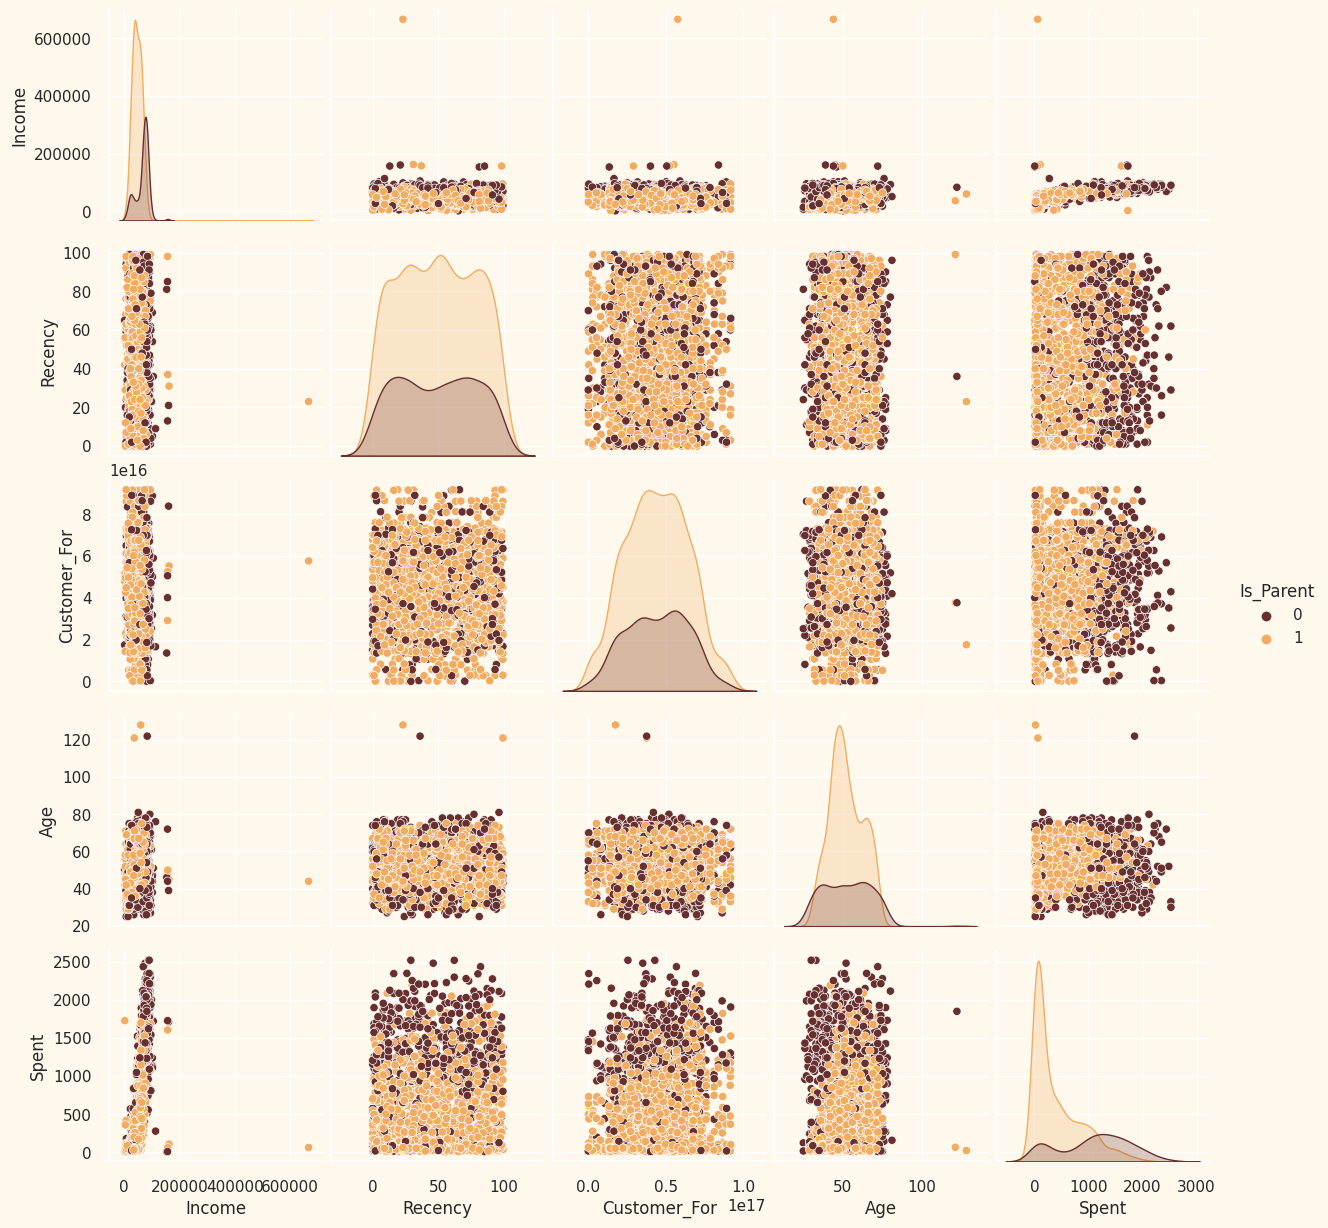

In [10]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

Dengan jelas terlihat bahwa ada beberapa pencilan (outliers) pada fitur Pendapatan dan Usia. Saya akan menghapus pencilan tersebut dari data.


In [11]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


Selanjutnya, mari kita lihat korelasi di antara fitur-fitur tersebut. (Mengecualikan atribut kategorikal pada tahap ini)

<ipython-input-12-dd18bcecb909>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


<Axes: >

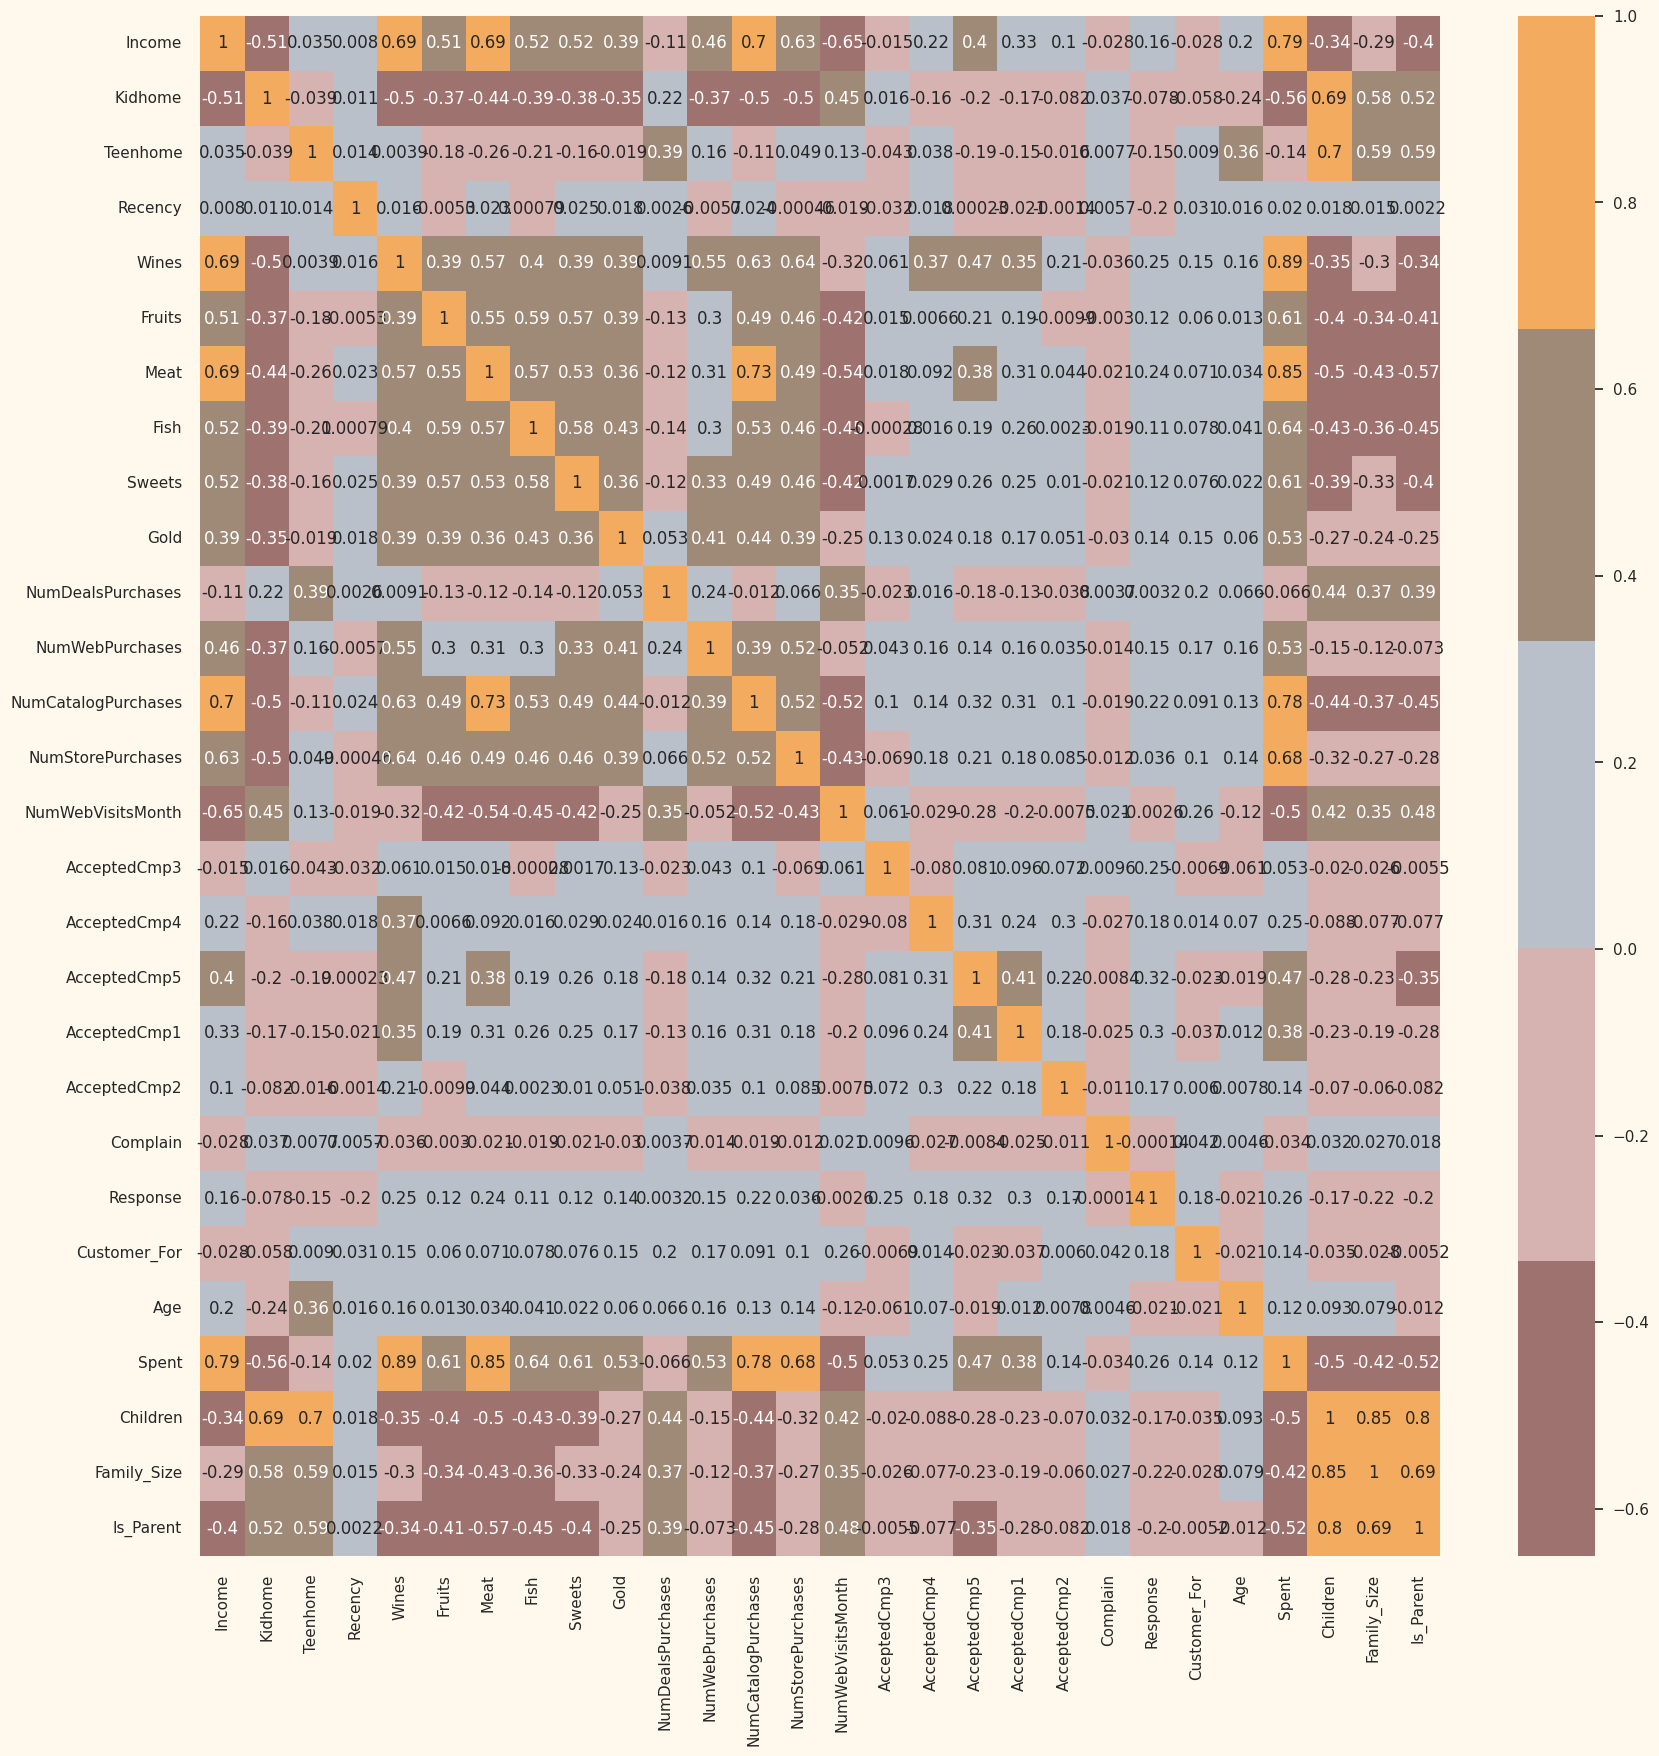

In [12]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Data ini cukup bersih dan fitur-fitur baru telah dimasukkan. Saya akan melanjutkan ke langkah berikutnya, yaitu, pra-pemrosesan data.


**Di bagian ini, saya akan memproses data untuk melakukan operasi clustering.**

Langkah-langkah berikut diterapkan untuk pra-pemrosesan data:
1. Label encoding pada fitur-fitur kategorikal.
2. Scaling fitur menggunakan standar scaler.
3. Membuat subset dataframe untuk reduksi dimensionalitas.


In [13]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [14]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [15]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [16]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

Dalam masalah ini, ada banyak faktor berdasarkan mana klasifikasi akhir akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin banyak jumlah fitur, semakin sulit bekerja dengannya. Banyak dari fitur-fitur ini berkorelasi, dan oleh karena itu bersifat redundan. Oleh karena itu, saya akan melakukan reduksi dimensionalitas pada fitur-fitur terpilih sebelum melewatinya ke pengklasifikasi.

Reduksi dimensionalitas adalah proses mengurangi jumlah variabel acak yang dipertimbangkan, dengan mendapatkan seperangkat variabel utama.

**Principal component analysis (PCA)** adalah teknik untuk mengurangi dimensionalitas dataset tersebut, meningkatkan interpretabilitas tetapi pada saat yang sama meminimalkan kehilangan informasi.

**Langkah-langkah dalam bagian ini:**
1. Reduksi dimensionalitas dengan PCA.
2. Plotting dataframe yang telah direduksi.

**Reduksi dimensionalitas dengan PCA**


In [17]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  2.569775e-17  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0  1.927331e-17  1.706839 -4.312196 -1.328316 -0.158123  1.242289   
col3  2212.0  2.810691e-17  1.221956 -3.530416 -0.829067 -0.022692  0.799895   

           max  
col1  7.444305  
col2  6.142721  
col3  6.611222

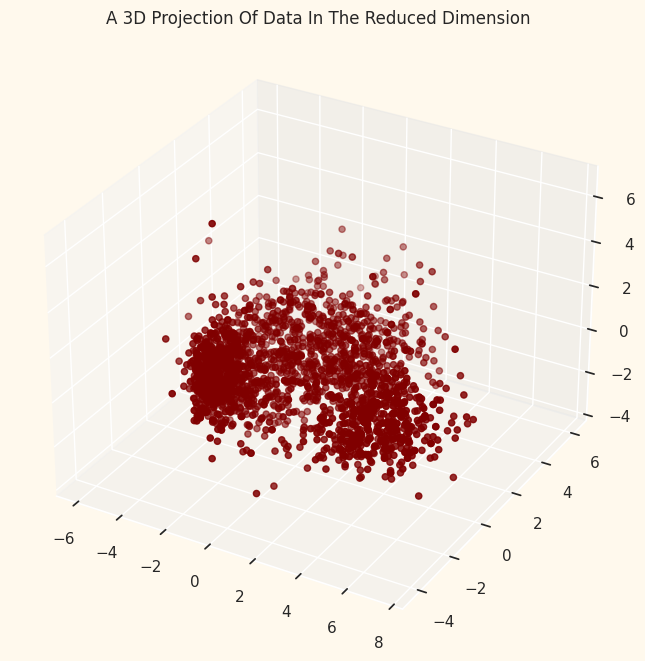

In [18]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Sekarang setelah saya telah mengurangi atribut menjadi tiga dimensi, saya akan melakukan clustering melalui metode Agglomerative clustering. Agglomerative clustering adalah metode clustering hierarkis. Ini melibatkan penggabungan contoh sampai jumlah klaster yang diinginkan tercapai.

**Langkah-langkah yang terlibat dalam Clustering:**
1. Metode Elbow untuk menentukan jumlah klaster yang akan dibentuk.
2. Clustering melalui Agglomerative Clustering.
3. Memeriksa klaster yang terbentuk melalui scatter plot.


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

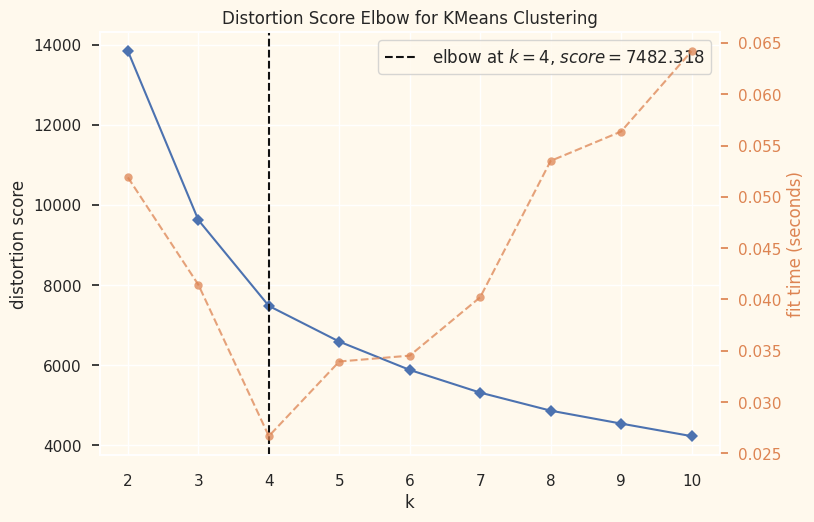

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Selanjutnya, kita akan menyesuaikan Model Agglomerative Clustering untuk mendapatkan klaster final.

In [20]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

Untuk memeriksa klaster yang terbentuk, mari kita lihat distribusi 3-D dari klaster tersebut.

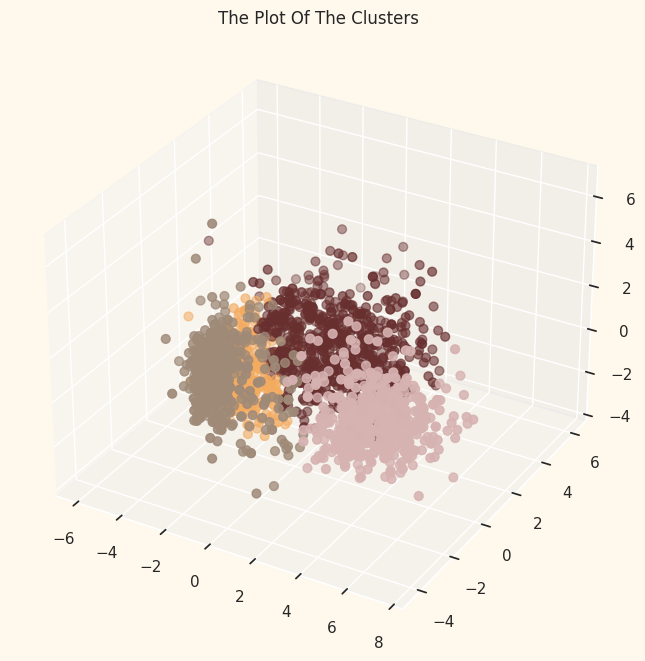

In [21]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Karena ini adalah pengelompokan tanpa pengawasan, kita tidak memiliki fitur berlabel untuk mengevaluasi atau memberi skor pada model kita. Tujuan dari bagian ini adalah untuk mempelajari pola-pola dalam klaster yang terbentuk dan menentukan sifat pola-pola klaster tersebut.

Untuk itu, kita akan melihat data dalam konteks klaster melalui analisis data eksploratif dan menarik kesimpulan.

**Pertama-tama, mari kita lihat distribusi kelompok dari pengelompokan tersebut.**

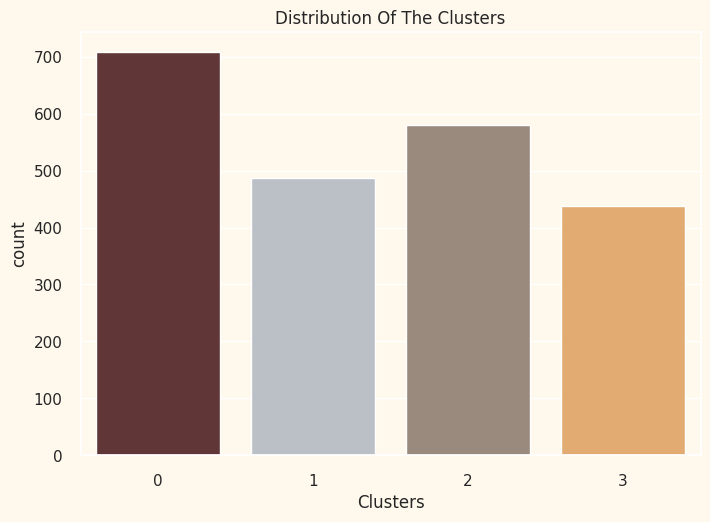

In [22]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

klaster-klasternya terdistribusi dengan cukup merata.

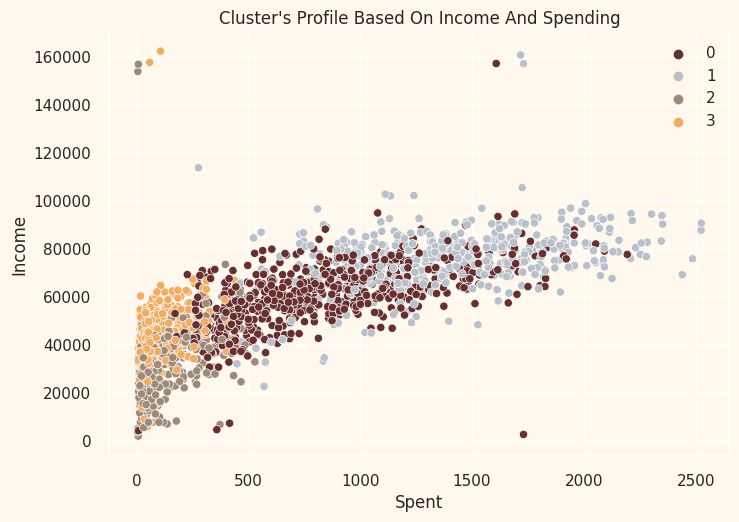

In [23]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Plot pendapatan versus pengeluaran menunjukkan pola klaster berikut:**

    Grup 0: Pengeluaran tinggi dan pendapatan rata-rata
    Grup 1: Pengeluaran tinggi dan pendapatan tinggi
    Grup 2: Pengeluaran rendah dan pendapatan rendah
    Grup 3: Pengeluaran tinggi dan pendapatan rendah

Selanjutnya, saya akan melihat distribusi rinci klaster berdasarkan berbagai produk dalam data. Yaitu: Wine, Buah, Daging, Ikan, Permen, dan Emas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.2% of the points cannot be place

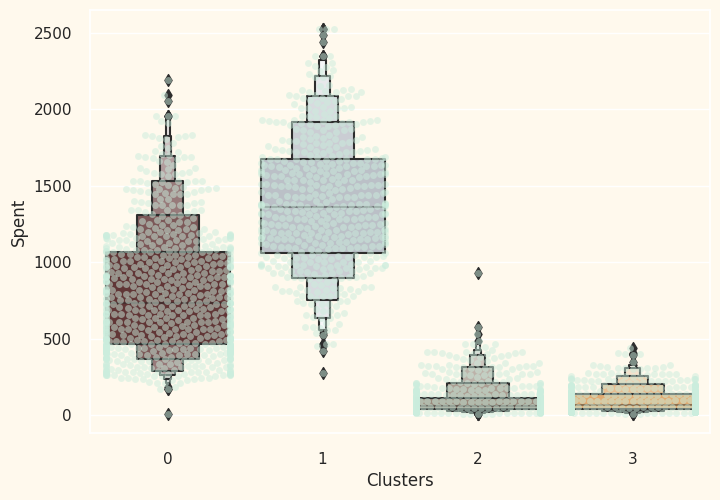

In [24]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

Dari plot di atas, dapat terlihat dengan jelas bahwa klaster 1 adalah set pelanggan terbesar kita, diikuti dengan cermat oleh klaster 0. Kita dapat menjelajahi apa yang dihabiskan setiap klaster untuk strategi pemasaran yang ditargetkan.

Selanjutnya, mari kita telusuri bagaimana performa kampanye-kampanye kita di masa lalu.

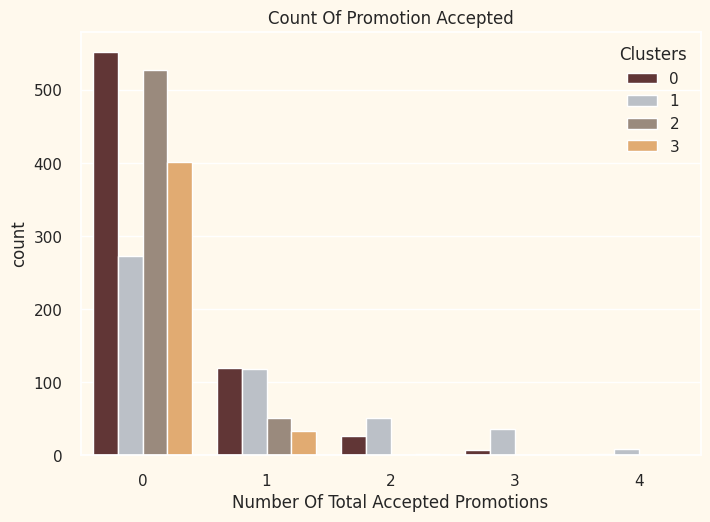

In [25]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

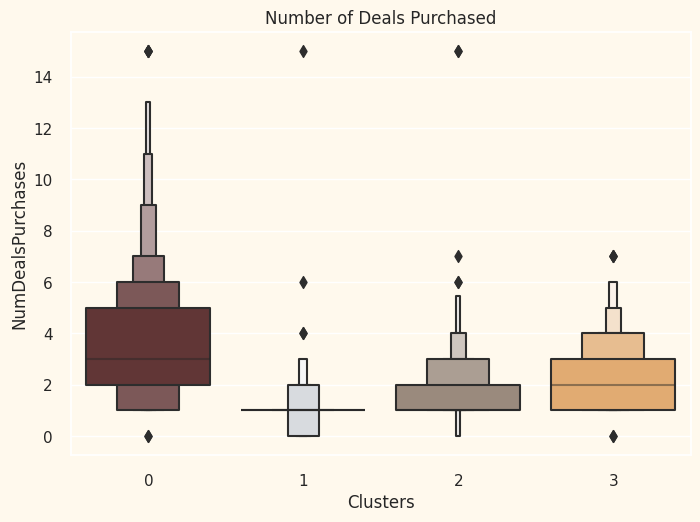

In [26]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Tidak seperti kampanye, penawaran yang diberikan tampaknya berhasil. Hasil terbaik ditemukan pada klaster 0 dan klaster 3. Namun, pelanggan bintang kita di klaster 1 tidak terlalu tertarik pada penawaran. Tidak ada yang sepertinya dapat menarik perhatian klaster 2 secara besar-besaran.


Sekarang bahwa kita telah membentuk klaster dan memeriksa kebiasaan pembelian mereka, mari kita lihat siapa saja yang ada dalam klaster-klasternya. Untuk itu, kita akan membuat profil dari klaster yang terbentuk dan mencapai kesimpulan tentang siapa pelanggan bintang kita dan siapa yang perlu mendapatkan perhatian lebih dari tim pemasaran toko ritel.

Untuk menentukan itu, saya akan membuat beberapa plot fitur yang mengindikasikan ciri-ciri personal pelanggan dengan mempertimbangkan klaster tempat mereka berada. Berdasarkan hasil tersebut, saya akan mencapai kesimpulan.

<Figure size 800x550 with 0 Axes>

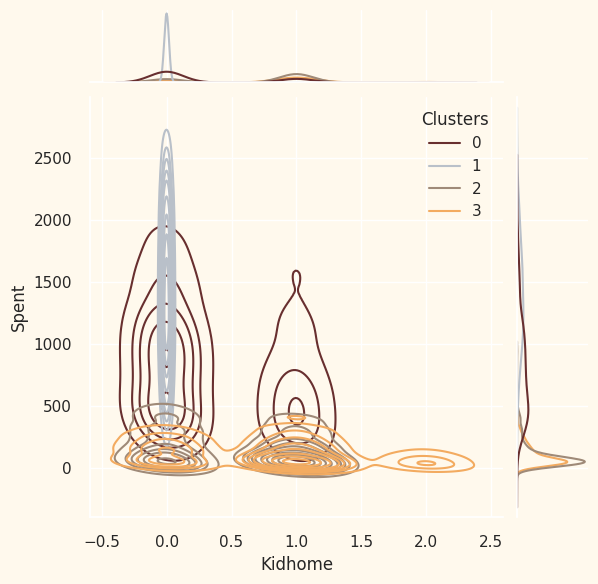

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

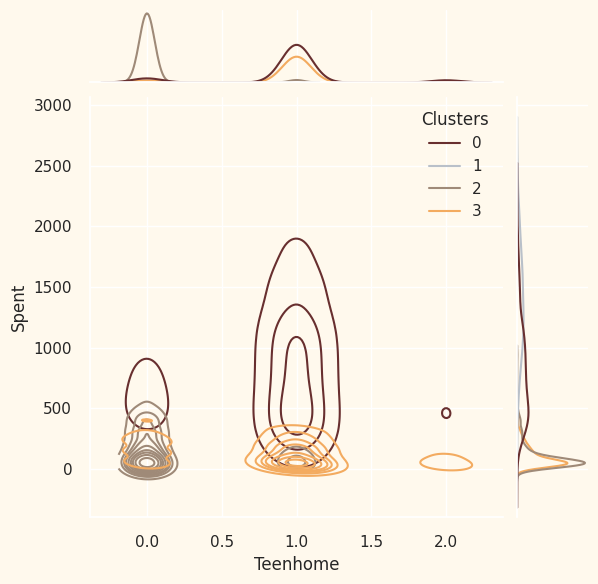

<Figure size 800x550 with 0 Axes>

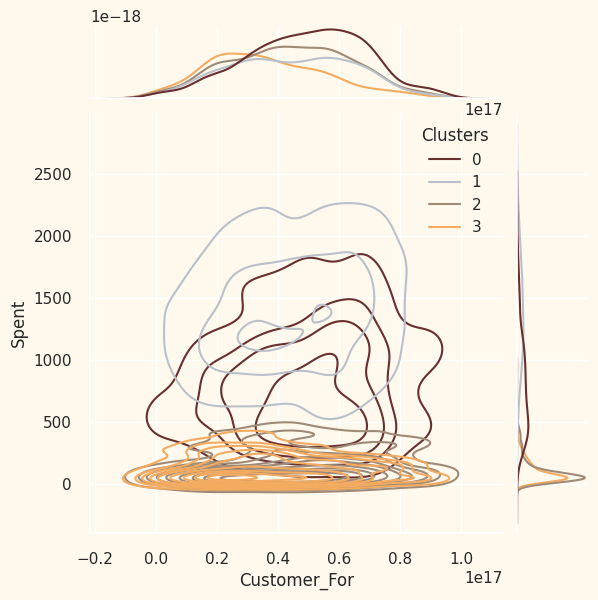

<Figure size 800x550 with 0 Axes>

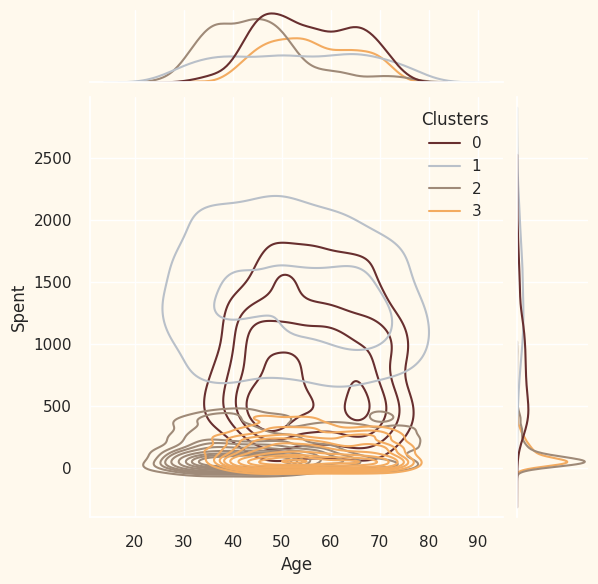

<Figure size 800x550 with 0 Axes>

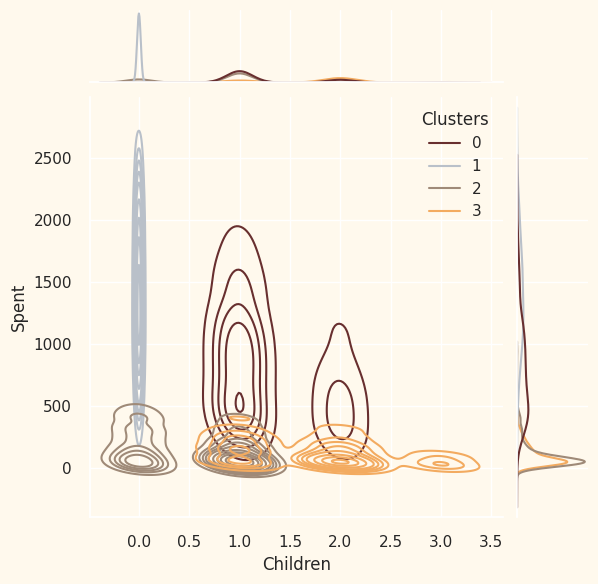

<Figure size 800x550 with 0 Axes>

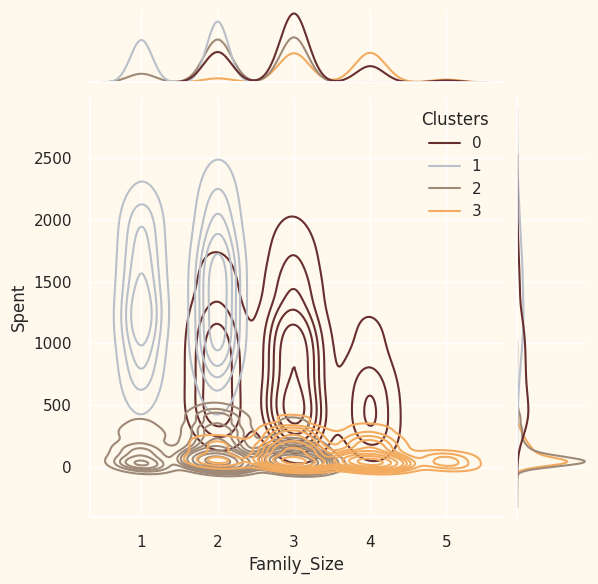

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

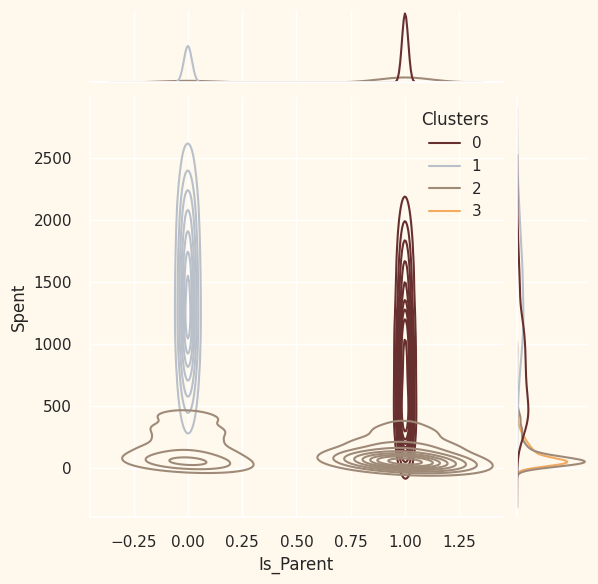

<Figure size 800x550 with 0 Axes>

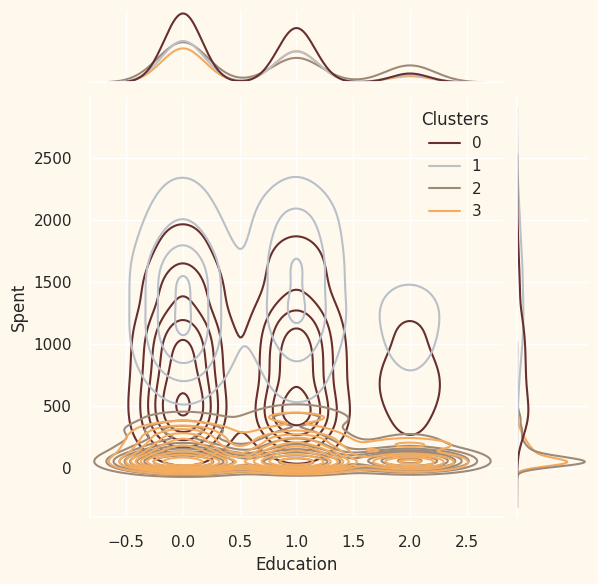

<Figure size 800x550 with 0 Axes>

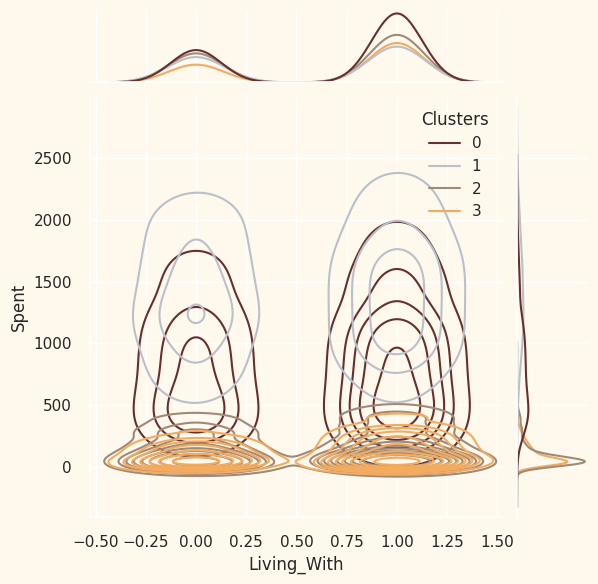

In [27]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

Informasi berikut dapat diperoleh tentang pelanggan dalam berbagai klaster.

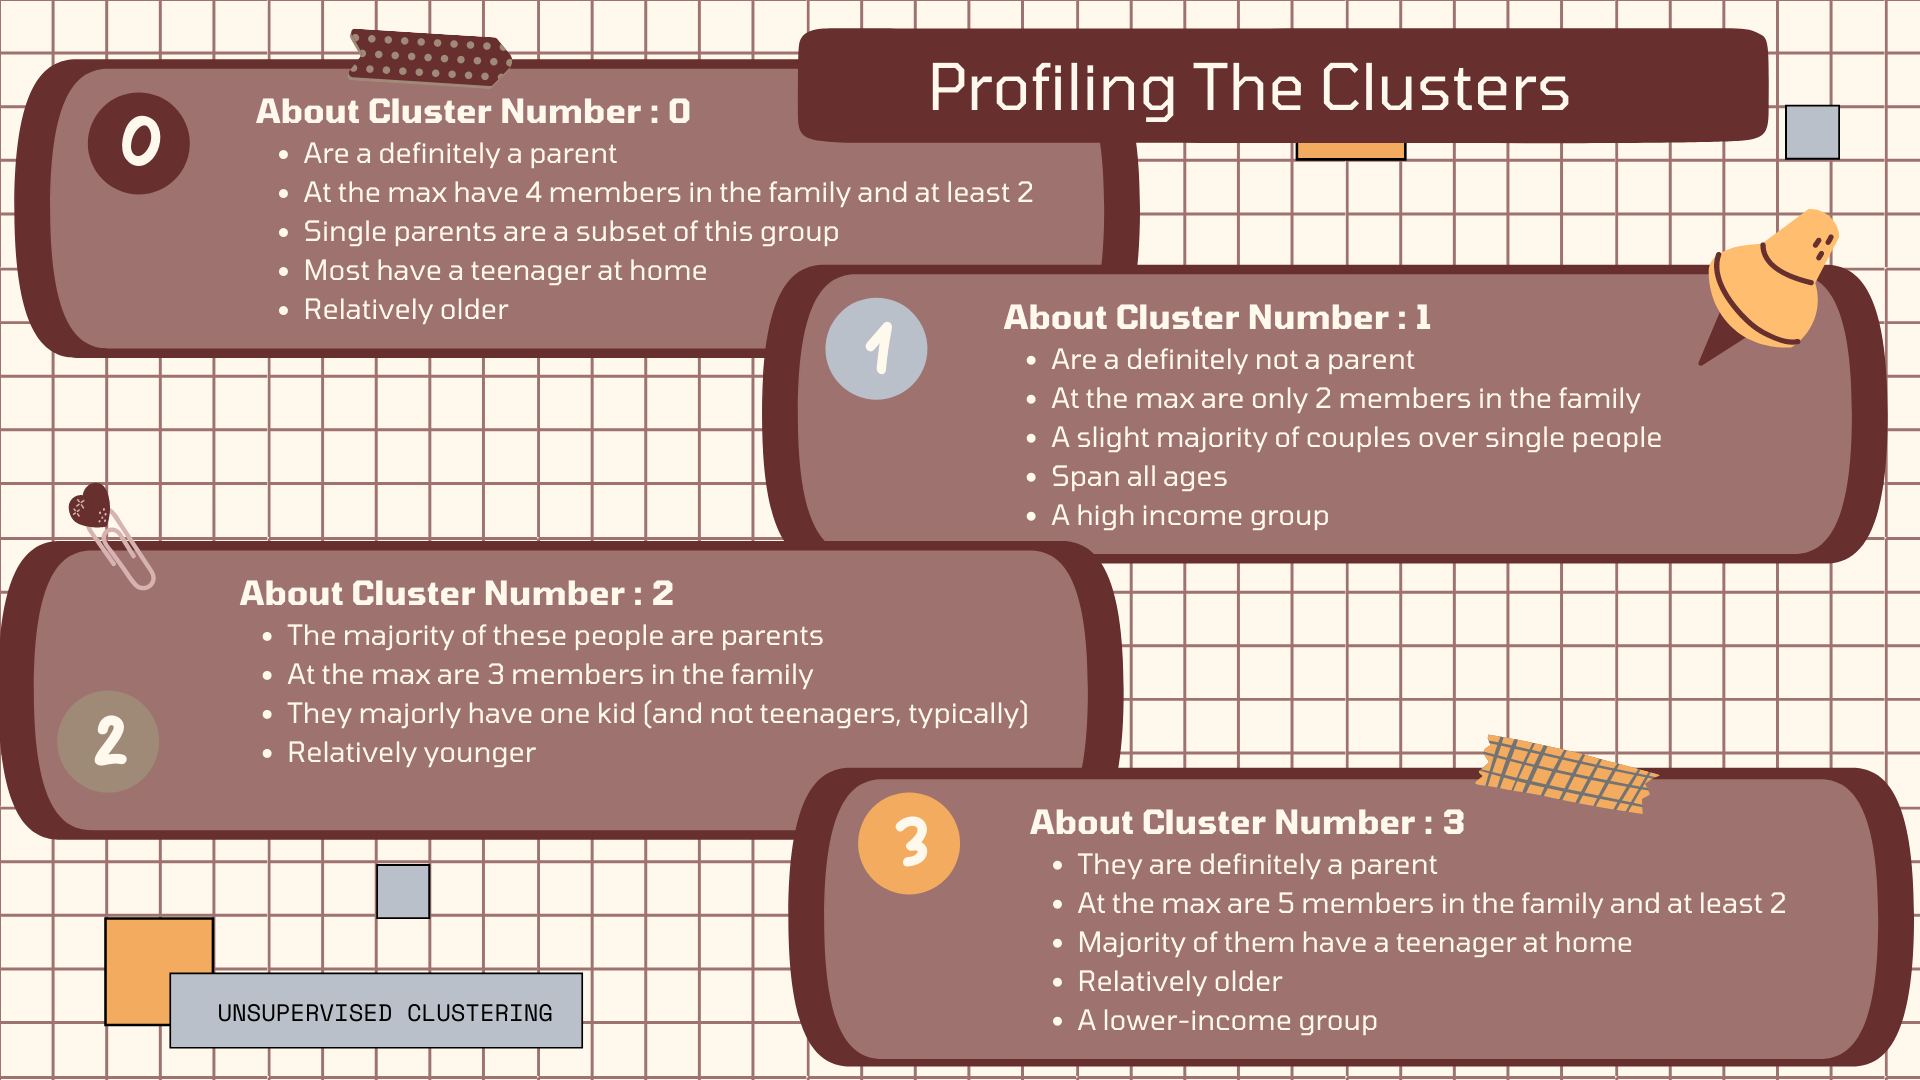

# mendapatkan 4 klaster dan kemudian menggunakannya untuk membuat profil pelanggan dalam klaster berdasarkan struktur keluarga mereka serta pendapatan/pengeluaran. Hal ini dapat digunakan dalam merencanakan strategi pemasaran yang lebih baik.